# IDM: Modelling Project Assessment

This notebook has been created for you to input your code for your modelling assignment, if you choose to use Jupyter notebooks for this rather than writing in R using RStudio.

In order to submit your code via Jupyter notebook, you will need to download the notebook and submit it as if you were submitting any other file. You will need to ensure that you have also included any external files which you have used.

Alternatively you can copy and paste your code - i.e. from the **code cells only** - into an .R file and submit this. If you have also made use of markdown - text - cells, then you could copy this into your .R file as comments.

Good luck!

[1] "percent symtomatic at peak: "


[1] 10.00605

[1] "percent of the population that dies from the disease"


[1] 5.021415

[1] "R0"


e 
2.157466

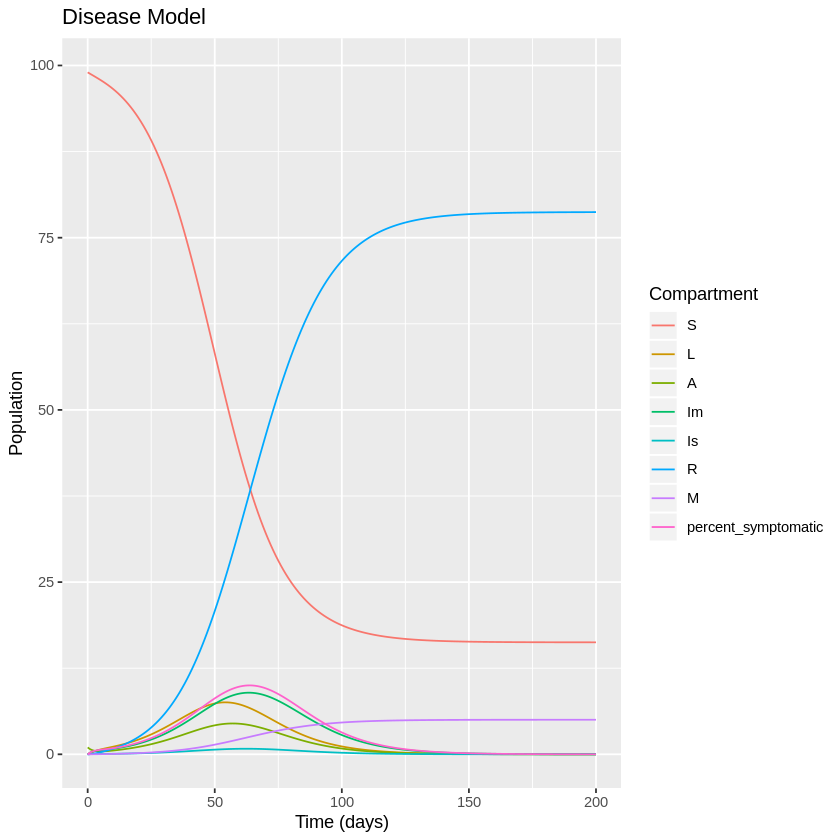

In [60]:
# Part 2

library(deSolve)
library(ggplot2)
library(reshape2)

#set up initial state, set population size to 100 for simplicity 
#and 1% infected
initial_state <- c(S=99, 
                  L=0,
                  A=1,
                  Im=0,
                  Is=0,
                  R=0,
                  M=0)

# governing equations of model
model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {     
        
      N <- S+L+A+Im+Is+R+M

      l <- (beta1 * A/N) + (beta2 * Im/N) + (beta3 * Is/N)

      dS <- -l*S     
      dL <- (l*S) - (a*L)
      dA <- (a*L) - (e*A)
      dIm <- (p*e*A) - (gm*Im)  
      dIs <- ((1-p)*e*A) - (gs*Is)  - (m*Is)
      dR <-  (gs*Is) + (gm*Im)      
      dM <- (m*Is)
      
    return(list(c(dS, dL, dA, dIm , dIs, dR, dM)))
    })
  
}

#specify provided/calculated parameters
parameters <- c(a = 1/5, 
                e = 1/3,
                p = 0.9,
                gm = 1/7,
                gs = 1/14,
                m = 0.107)   

#initialize times - iterate for tweaking parameters to find right timescale
times <- seq(from = 0, to = 200, by = 1)   

#assume beta is the same across different compartments,
#manually calibrated for correct value for ~10% of population symptomatic at peak
beta1 = beta2 = beta3 <- 0.2188

#create output data, append column for percent of currently living population that's symptomatic
output <- as.data.frame(ode(y = initial_state, 
                            times = times, 
                            func = model,
                            parms = parameters))
output$percent_symptomatic <- apply(output, 1, 
                                    function(x) {(100*(x['Im']+x['Is'])) / (x['S']+x['L']+x['A']+x['Im']+x['Is']+x['R'])})

#print symptomatic population at peak to confirm visual
print("percent symtomatic at peak: ")
max(output$percent_symptomatic)
print("percent of the population that dies from the disease")
max(output$M)
print("R0")
R0 <- (beta1/parameters['e']) + (0.9 * beta2 / parameters['gm']) + (0.1 * beta3 / (parameters['m'] + parameters['gs']))
R0

output_long <- melt(as.data.frame(output), id = "time")                 

ggplot(data = output_long,                                               
       aes(x = time, y = value, colour = variable, group = variable)) +  
  geom_line() + 
  xlab("Time (days)") +                                                  
  ylab("Population") +                                                     
  labs(colour = "Compartment",                                          
       title = "Disease Model")          

[1] "percent symtomatic at peak: "


[1] 1.684488

[1] "percent of the population that dies from the disease"


[1] 1.650081

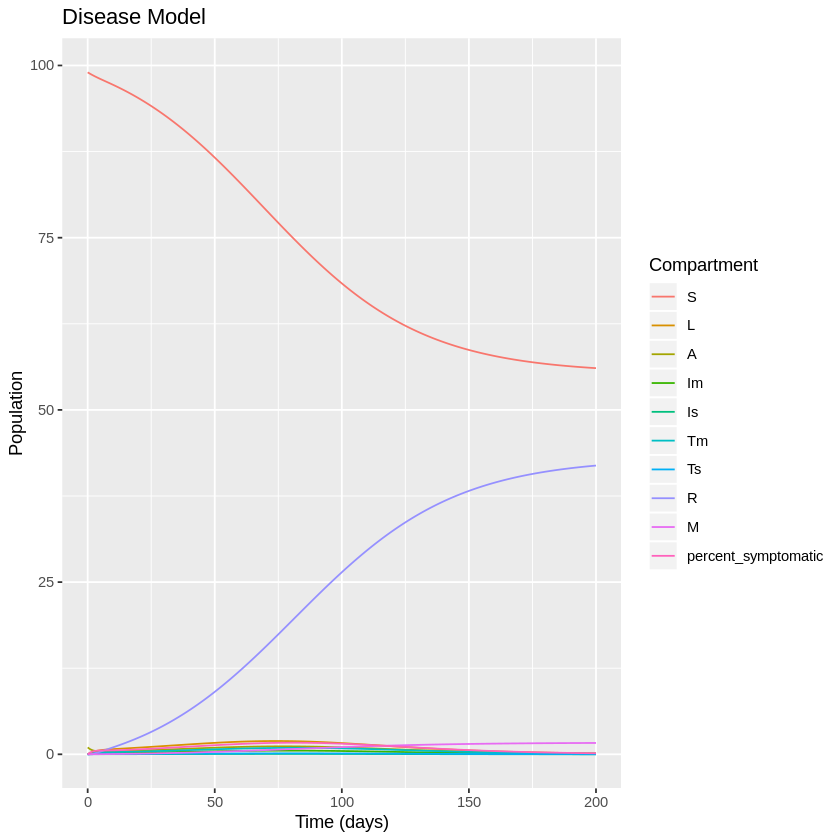

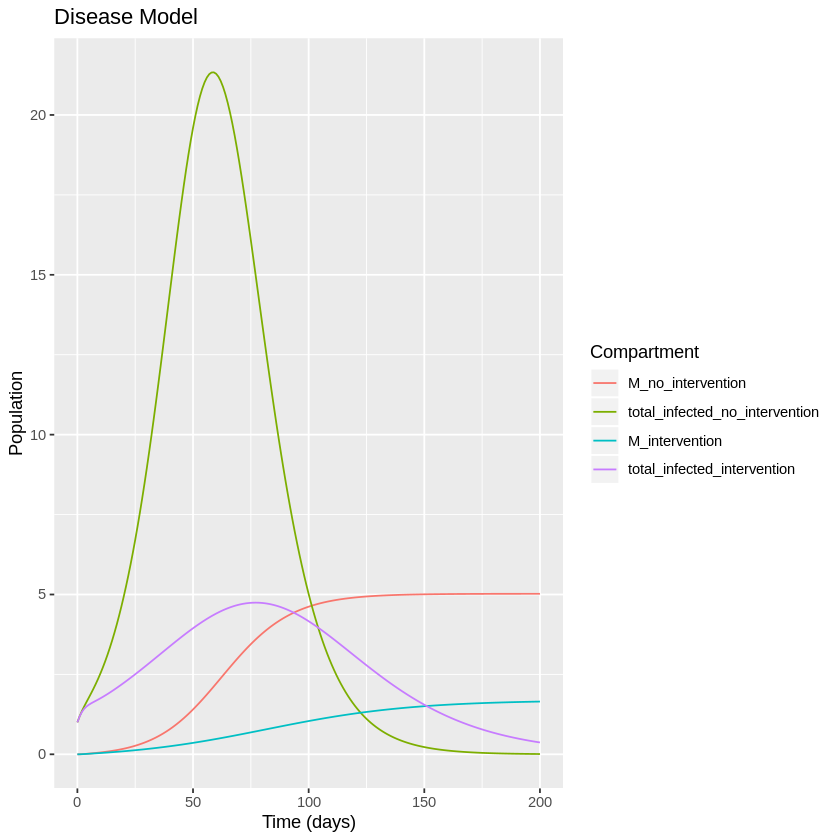

In [61]:
# Part 3

initial_state <- c(S=99, 
                  L=0,
                  A=1,
                  Im=0,
                  Is=0,
                  Tm=0,
                  Ts=0,
                  R=0,
                  M=0)
                  
model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {     
        
      N <- S+L+A+Im+Is+R+M+Tm+Ts

      l <- (beta1 * A/N) + (beta2 * Im/N) + (beta3 * Is/N) + (beta4 * Tm/N) + (beta5 * Ts / N)

      dS <- -l*S     
      dL <- (l*S) - (a*L)
      dA <- (a*L) - (e*A)
      dIm <- (p*e*A) - (gm*Im) - (hm*Im) 
      dIs <- ((1-p)*e*A) - (gs*Is)  - (m*Is) - (hs*Is)
      dTm <- (hm*Im) - (Tm*gtm)
      dTs <- (hs*Is) - (Ts*gts) - (mt*Ts)
      dR <-  (gs*Is) + (gm*Im) + (Ts*gts) + (Tm*gtm)     
      dM <- (m*Is) + (mt*Ts)
      
    return(list(c(dS, dL, dA, dIm , dIs, dTm, dTs, dR, dM)))
    })
  
}

#specify provided/calculated parameters
parameters <- c(a = 1/5, 
                e = 1/3,
                p = 0.9,
                gm = 1/7,
                gs = 1/14,
                hm = 1/2,
                hs = 1/2,
                gtm = 1/3.5,
                gts = 1/7,
                mt = 0.0612,
                m = 0.107)   

beta1 = beta2 = beta3 <- 0.2188
beta4 = beta5 <- beta1 / 2

#initialize times - keep same timescale as without intervention for comparison
times <- seq(from = 0, to = 200, by = 1)   


output_intervention <- as.data.frame(ode(y = initial_state, 
                            times = times, 
                            func = model,
                            parms = parameters))

output_intervention$percent_symptomatic <- apply(output_intervention, 1, 
                                    function(x) {(100*(x['Im']+x['Is']+x['Ts']+x['Tm'])) / (x['S']+x['L']+x['A']+x['Im']+x['Is']+x['R']+x['Tm']+x['Ts'])})

print("percent symtomatic at peak: ")
max(output_intervention$percent_symptomatic)
print("percent of the population that dies from the disease")
max(output_intervention$M)

output_long_intervention <- melt(as.data.frame(output_intervention), id = "time")        

ggplot(data = output_long_intervention,                                               
       aes(x = time, y = value, colour = variable, group = variable)) +  
  geom_line() + 
  xlab("Time (days)") +                                                  
  ylab("Population") +                                                     
  labs(colour = "Compartment",                                          
       title = "Disease Model")     

#rename columns for putting both dataframes on the same plot
names(output)[names(output) == 'S'] <- 'S_no_intervention'
names(output)[names(output) == 'R'] <- 'R_no_intervention'
names(output)[names(output) == 'M'] <- 'M_no_intervention'

names(output_intervention)[names(output_intervention) == 'S'] <- 'S_intervention'
names(output_intervention)[names(output_intervention) == 'R'] <- 'R_intervention'
names(output_intervention)[names(output_intervention) == 'M'] <- 'M_intervention'

output$total_infected_no_intervention <- apply(output, 1, 
                                    function(x) {(x['L']+x['A']+x['Im']+x['Is'])})
                                                 
output_intervention$total_infected_intervention <- apply(output_intervention, 1, 
                                    function(x) {(x['L']+x['A']+x['Im']+x['Is']+x['Ts']+x['Tm'])})
output_subset<-output[c('time','M_no_intervention','total_infected_no_intervention')]
output_long <- melt(as.data.frame(output_subset), id = "time")   
output_intervention_subset <- output_intervention[c('time','M_intervention','total_infected_intervention')]
output_intervention_long <- melt(as.data.frame(output_intervention_subset), id = "time")        


combined_output_long <- rbind(output_long, output_intervention_long)


ggplot(data = combined_output_long,                                               
       aes(x = time, y = value, colour = variable, group = variable)) +  
  geom_line() + 
  xlab("Time (days)") +                                                  
  ylab("Population") +                                                     
  labs(colour = "Compartment",                                          
       title = "Disease Model")  